In [5]:
#-- Module imports
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
#-- Helper functions
def parse_fname(filename:str):
    fname = os.path.splitext(os.path.basename(filename))[0]
    _, const, _, molecule, unit, decimal = fname.split("_")
    zcount = 2 if int(unit) >= 10 else 3
    molecule, range_type = molecule[:2], molecule[2:]
    decimal, units = decimal[:zcount], decimal[zcount:]
    energy = int(unit) + int(decimal)/(10 ** zcount)
    return (const, molecule, range_type, energy, units)

def get_style(mol, en):
    # style = "--" if mol == "Ge" else "-"
    style="-"
    return style

def plot_file(filename:str):
    data = np.loadtxt(filename)
    const, mol, rtype, en, units = parse_fname(filename)
    plt.xscale("log")
    plt.yscale("log")
    ax = plt.gca()
    if mol == "Xe":
        ax.set_xlim([1e-2, 10])
        ax.set_ylim([1e-36, 1e-17])
    elif mol == "Ge":
        ax.set_xlim([10**(-1.5), 10])
        ax.set_ylim([1e-28, 1e-21])
    plt.xlabel(r"$T \text{(keV)}$") # energy transfer (in keV)
    plt.ylabel(r"$\frac{\text{d}\sigma\vec{v}}{\text{d}T} \text{cm}^3 \text{keV}^{-1} \text{day}^{-1}$") # averaged velocity-weighted differential cross sections (in cm^3/keV/day)
    plt.plot(data[:,0], data[:,1], get_style(mol, en), linewidth=3, label=f"{mol} {en} {units}")

def make_plot(molecule:str, range_type:str, energy:float, exclude:set=None):
    '''
    molecule: Ge or Xe
    range_type: SR or LR
    energy: float
    '''
    molecule = molecule.capitalize()
    range_type = range_type.upper()
    const = "d4" if range_type == "LR" else "c4"
    unit = int(np.floor(energy))
    zcount = 2 if unit >= 10 else 3
    dec = str(int((energy - unit) * 10**zcount))
    # print(unit, dec, zcount, dec.zfill(zcount))
    path = f"data/{molecule}_{const}/data_{const}_avDCS_{molecule}{range_type}_{unit}_{dec.zfill(zcount)}GeV.txt"
    if path in exclude or not os.path.isfile(path):
        return False
    plot_file(path)
    exclude.add(path)
    return True

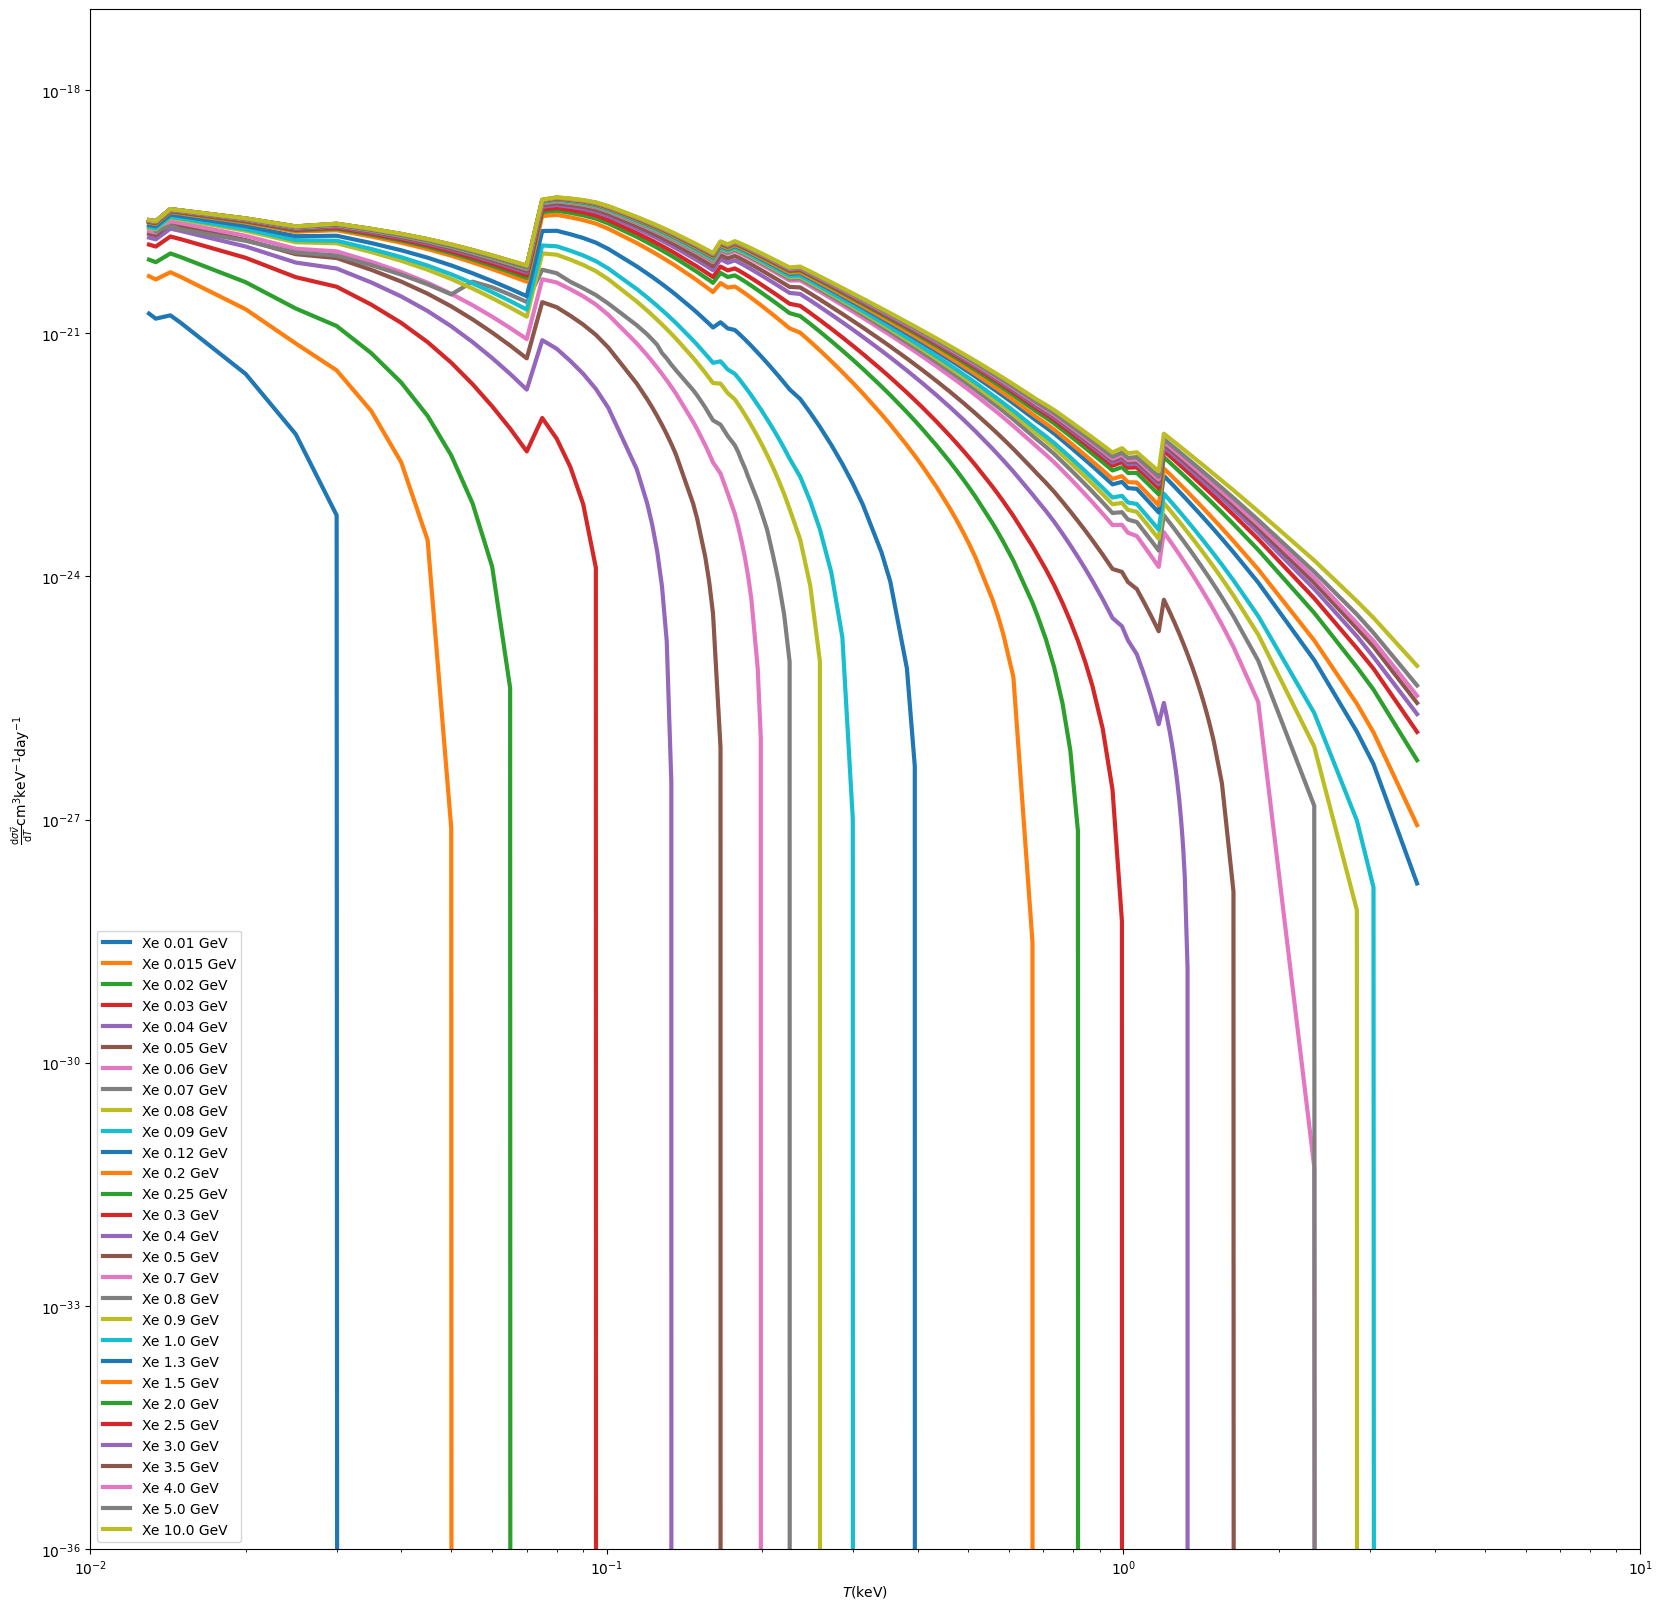

In [8]:
#-- Velocity differential vs energy plot
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
done = set()
for i in range(0, 20000):
    i = i/1000
    made = make_plot("xe", "sr", i, exclude=done)
plt.legend(loc="lower left")
plt.show()

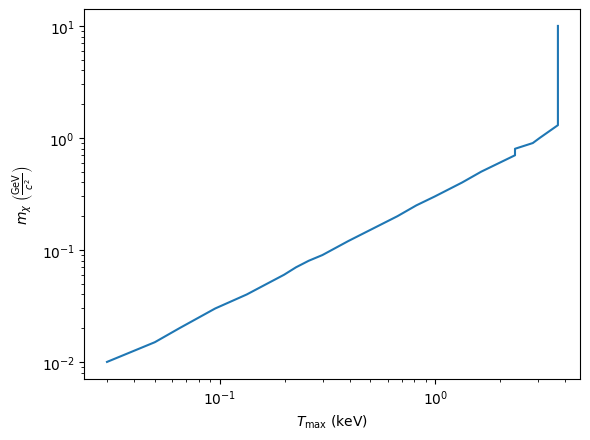

In [9]:
#-- Tmax vs mass
Ts = []
Masses = []
for p in done:
    maxT = 0
    arr = np.loadtxt(p)
    for x, y in arr:
        if y != 0.0:
            maxT = x
        else:
            break
    _, _, _, en, _ = parse_fname(p)
    Masses.append(en)
    Ts.append(maxT)
Masses = np.array(Masses, dtype=np.float64)
Ts = np.array(Ts, dtype=np.float64)
arr = np.vstack([Ts, Masses]).T
arr = arr[arr[:, 1].argsort()]
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T_\text{max}$ (keV)")
plt.ylabel(r"$m_{\chi}$ $\left(\frac{\text{GeV}}{c^2}\right)$")
plt.plot(arr[:,0], arr[:,1])
plt.show()